## Ejercicio Final Módulo 3

Importación de librerías.

In [1]:
#Tratamiento de datos
import pandas as pd
# -----------------------------------------------------------------------

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #establece el estilo del fondo de las gráficas como 'whitegrid'.
sns.set_theme(style='dark') #cambia el esquema de colores predeterminado de Seaborn a uno más oscuro. 
plt.style.use('fast') #cambia el estilo de gráfico. 
# -----------------------------------------------------------------------

#Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
# -----------------------------------------------------------------------

#Realizar los distintos test
from scipy import stats
from scipy.stats import levene, shapiro, poisson, chisquare, expon, kstest, mannwhitneyu
from sklearn.linear_model import LinearRegression
# -----------------------------------------------------------------------

#Configuaración para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)
# -----------------------------------------------------------------------

In [2]:
url_activity='https://raw.githubusercontent.com/isamartineztorrego/Promo-H-DA-modulo3-evaluacion-final-IsabelMartinez/main/Previous_data/Customer%20Flight%20Activity.csv'
df_activity=pd.read_csv(url_activity)
df_activity.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0


In [3]:
url_history='https://raw.githubusercontent.com/isamartineztorrego/Promo-H-DA-modulo3-evaluacion-final-IsabelMartinez/main/Previous_data/Customer%20Loyalty%20History.csv'
df_history=pd.read_csv(url_history)
df_history.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


### Fase 1. Exploración y limpieza.
#### 1. Exploración inicial.
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas.

- Une los dos conjuntos de datos de la forma más eficiente.

1.1 Empiezo con una exploracón individual de cada DataFrame para conocerlos y entenderlos.

In [4]:
#Creo una función que me servirá para los dos conjuntos de datos.
def exploratory_analysis(df):
    #Veo la información general
    print('General info:\n')
    df.info()
    print('\n--------------------------------\n')

    #Saco un df con la cantidad de nulos y su %
    df_null=pd.DataFrame({'Null': df.isnull().sum(),
                          '% null': (df.isnull().mean()*100).round(2)})
    print('Total nulls:')
    display(df_null)
    print('\n--------------------------------\n')

    #Saco los duplicados
    #Calcula los ducplicados
    duplicates=df.duplicated().sum()
    if duplicates > 0:
        print(f'There are a total of {duplicates} duplicates in the DataFrame.')
        print('\n--------------------------------\n')
    else:
        print('There are no duplicates in the DataFrame.')
        print('\n--------------------------------\n')


    #Saco las estadísticas de las columnas categóricas y de las columnas numéricas
    #Puede ser que no haya ninguna columna categórica, así que las guardo en una lista y, si esa lista no tiene ninguna columna, imprimo un mensaje de que no existen columnas categóricas
    categorical_columns=df.select_dtypes(include='O').columns
    if len(categorical_columns) == 0:
        print(f'There are no categorical columns in the DataFrame.')
        print('\n--------------------------------\n')
        df_categorical_stats=None
    else:
        print("Categorical columns' statistics:")
        df_categorical_stats=df.describe(include='O').T
        display(df_categorical_stats)
        print('\n--------------------------------\n')

    #Saco las estadísticas de las columnas numéricas
    print("Numerical columns' statistics:")
    display(df.describe().T)
    print('\n--------------------------------\n')

    #Saco los valores únicos de cada columna
    for i in df.columns:
        total_value_count=df[i].value_counts().sum()
        print(f'Total unique values per column {i.upper()}: {total_value_count}')
        display(pd.DataFrame(df[i].value_counts()).head())

In [5]:
#Exploro el df_activity
exploratory_analysis(df_activity)

General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

--------------------------------

Total nulls:


,Null,% null
Loyalty Number,0,0.0
Year,0,0.0
Month,0,0.0
Flights Booked,0,0.0
Flights with Companions,0,0.0
Total Flights,0,0.0
Distance,0,0.0
Points Accumulated,0,0.0
Points Redeemed,0,0.0
Dollar Cost Points Redeemed,0,0.0



--------------------------------

There are a total of 1864 duplicates in the DataFrame.

--------------------------------

There are no categorical columns in the DataFrame.

--------------------------------

Numerical columns' statistics:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



--------------------------------

Total unique values per column LOYALTY NUMBER: 405624


,count
Loyalty Number,
678205,72
989528,48
373638,48
684889,48
684881,48


Total unique values per column YEAR: 405624


,count
Year,
2017,202812
2018,202812


Total unique values per column MONTH: 405624


,count
Month,
1,33802
9,33802
2,33802
3,33802
11,33802


Total unique values per column FLIGHTS BOOKED: 405624


,count
Flights Booked,
0,197992
3,18228
11,15705
5,15084
7,14561


Total unique values per column FLIGHTS WITH COMPANIONS: 405624


,count
Flights with Companions,
0,296887
2,19272
3,19015
1,17905
4,13665


Total unique values per column TOTAL FLIGHTS: 405624


,count
Total Flights,
0,197992
6,15273
10,14393
8,14056
4,13656


Total unique values per column DISTANCE: 405624


,count
Distance,
0,197992
2520,410
2880,401
1680,389
2160,365


Total unique values per column POINTS ACCUMULATED: 405624


,count
Points Accumulated,
0.0,197992
180.0,763
270.0,734
288.0,717
189.0,709


Total unique values per column POINTS REDEEMED: 405624


,count
Points Redeemed,
0,381443
447,103
523,100
443,98
516,97


Total unique values per column DOLLAR COST POINTS REDEEMED: 405624


,count
Dollar Cost Points Redeemed,
0,381443
36,1037
38,1001
40,993
42,983


In [6]:
#Exploro df_history
exploratory_analysis(df_history)

General info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   fl

,Null,% null
Loyalty Number,0,0.00
Country,0,0.00
Province,0,0.00
City,0,0.00
Postal Code,0,0.00
Gender,0,0.00
Education,0,0.00
Salary,4238,25.32
Marital Status,0,0.00
Loyalty Card,0,0.00



--------------------------------

There are no duplicates in the DataFrame.

--------------------------------

Categorical columns' statistics:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766



--------------------------------

Numerical columns' statistics:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



--------------------------------

Total unique values per column LOYALTY NUMBER: 16737


,count
Loyalty Number,
480934,1
208485,1
455896,1
469781,1
533488,1


Total unique values per column COUNTRY: 16737


,count
Country,
Canada,16737


Total unique values per column PROVINCE: 16737


,count
Province,
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658


Total unique values per column CITY: 16737


,count
City,
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582


Total unique values per column POSTAL CODE: 16737


,count
Postal Code,
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534


Total unique values per column GENDER: 16737


,count
Gender,
Female,8410
Male,8327


Total unique values per column EDUCATION: 16737


,count
Education,
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


Total unique values per column SALARY: 12499


,count
Salary,
101933.0,23
62283.0,14
61809.0,14
51573.0,14
64001.0,13


Total unique values per column MARITAL STATUS: 16737


,count
Marital Status,
Married,9735
Single,4484
Divorced,2518


Total unique values per column LOYALTY CARD: 16737


,count
Loyalty Card,
Star,7637
Nova,5671
Aurora,3429


Total unique values per column CLV: 16737


,count
CLV,
8564.77,13
13024.13,12
3808.12,12
2359.42,12
3731.50,12


Total unique values per column ENROLLMENT TYPE: 16737


,count
Enrollment Type,
Standard,15766
2018 Promotion,971


Total unique values per column ENROLLMENT YEAR: 16737


,count
Enrollment Year,
2018,3010
2017,2487
2016,2456
2013,2397
2014,2370


Total unique values per column ENROLLMENT MONTH: 16737


,count
Enrollment Month,
5,1503
12,1480
7,1473
11,1446
10,1444


Total unique values per column CANCELLATION YEAR: 2067


,count
Cancellation Year,
2018.0,645
2017.0,506
2016.0,427
2015.0,265
2014.0,181


Total unique values per column CANCELLATION MONTH: 2067


,count
Cancellation Month,
12.0,213
11.0,212
8.0,208
7.0,186
10.0,180


1.2 Observo que df_activity contiene duplicados. Antes de eliminarlos, voy a consultarlos.

In [7]:
#Visualizo los duplicados antes de eliminarlos
duplicated_rows=df_activity[df_activity.duplicated(keep=False)]
duplicated_rows

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [8]:
#Elimino los duplicados
df_activity.drop_duplicates(inplace=True)

#Compruebo que no quede ningún duplicado
df_activity.duplicated().sum()

0

1.3 Observo que la columna Salary contiene valores negativos, que trataré en la siguiente fase.

1.4 Unión de los dos dataframes.

In [9]:
#Hago un left merge donde df_activity está a la izquierda y agrega los datos de df_history a la derecha, rellenando con NaN donde no haya coincidencias.
df_customers=pd.merge(left=df_activity, right=df_history, on='Loyalty Number', how='left')
df_customers.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [10]:
#Veo la información general del dataframe resultante
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

#### 2. Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

2.1 Lo primero que hago es eliminar posibles espacios en blanco que pueda haber al principio y/o al final de las celdas, y estandarizar todas las celdas con formato Capitalize y con '_' como separador entre palabras.

In [12]:
#Creo la función para quitar espacios y convertir a capitalize
def strip_capitalize_replace(cell):
    #si la celda es una instancia de clase string
    if isinstance(cell, str):
        return cell.strip().capitalize().replace(' ', '_')
    return cell

#Aplico la función a todo el df
df_customers=df_customers.applymap(strip_capitalize_replace) #applymap() porque la aplico a cada elemento del df

/tmp/ipykernel_16119/2337294260.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_customers=df_customers.applymap(strip_capitalize_replace) #applymap() porque la aplico a cada elemento del df


2.2 Hago lo mismo para los títulos de las columnas

In [13]:
new_column_names={}
for old_name in df_customers.columns:
    new_column_names[old_name]=strip_capitalize_replace(old_name)

df_customers=df_customers.rename(columns=new_column_names)


2.3 Corrección de los valores negativos de la columna salarios.

In [14]:
#Visualizo los valores negativos
negative_values=df_customers[df_customers['Salary'] < 0]
negative_values

,Loyalty_number,Year,Month,Flights_booked,Flights_with_companions,Total_flights,Distance,Points_accumulated,Points_redeemed,Dollar_cost_points_redeemed,Country,Province,City,Postal_code,Gender,Education,Salary,Marital_status,Loyalty_card,Clv,Enrollment_type,Enrollment_year,Enrollment_month,Cancellation_year,Cancellation_month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St._john's,A1c_6h9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018_promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1j_8t7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018_promotion,2018,2,NaN,NaN
1716,194065,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5v_1g5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018_promotion,2018,2,NaN,NaN
2081,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2t_6g3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018_promotion,2018,2,NaN,NaN
2433,232755,2017,1,0,0,0,0,0.0,0,0,Canada,British_columbia,Vancouver,V1e_4r6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018_promotion,2018,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1j_3c5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018_promotion,2018,4,NaN,NaN
399884,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8v_4b2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018_promotion,2018,2,NaN,NaN
402017,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2k_6r0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018_promotion,2018,4,NaN,NaN
402459,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St._john's,A1c_6h9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018_promotion,2018,3,NaN,NaN


In [15]:
#Veo que son un total de 480 valores negativos, calculo qué porcentaje del total representan antes de tomar una decisión
count_negatives=len(negative_values)
total_values=df_customers['Salary'].count()
percentage_negatives=round((count_negatives / total_values) *100, 2)
percentage_negatives

0.16

In [16]:
#Al ser un porcentaje tan bajo de valores negativos (0.16%), asumo que ha sido un typo y los paso a positivos (lo consultaría con el cliente de tener la posibilidad)
df_customers['Salary']=abs(df_customers['Salary'])
#Reviso que no haya quedado ningún valor negativo
df_customers['Salary'].min()

9081.0

2.4 Corrección de tipos de datos:
- Points Accumulated: es float, lo paso a int para mayor consistencia con la columna 'Points Redeemed'.

- Cancellation_year y Cancellation_month: son float, los pasaré a string en el punto 2.7.

In [17]:
df_customers['Points_accumulated']=df_customers['Points_accumulated'].astype(int)

2.5 Paso a float las columnas Distance y Dollar_cost_points_redeemed.

In [18]:
#Creo la función para convertir de int a float
def int_to_float(df, columns):
    for i in columns:
        df[i]=df[i].astype(float)
    return df

#Aplico la función a las columns
df_customers=int_to_float(df_customers, ['Distance', 'Dollar_cost_points_redeemed'])

2.6 Elimino la columna Country ya que tiene un sólo valor único (Canada).

In [19]:
df_customers.drop(['Country'], axis=1, inplace=True)

2.7 Gestión de nulos. Columnas Cancellation_year y Cancellation_month, 87.65%.

Teniendo en cuenta el nombre de las columnas, asumo (*preguntaría al cliente de ser un caso real*) que hacen referencia a la fecha en que se dio de baja la Loyalty_card y que, al ser nulo, significa que está activa. Reemplazo nulos con la palabra `Active`.


In [20]:
#Reemplazo Cancellation_year y Cancellation_month
columns_active=['Cancellation_year', 'Cancellation_month']

#Son float, las paso a string
for i in columns_active:
    df_customers[i]=df_customers[i].astype(str).str.split('.').str[0]

#Al haberlo pasado a string, los nulos pasan a ser una cadena 'nan', que sustituyo por 'Active'
for i in columns_active:
    df_customers[i]=df_customers[i].replace('nan', 'Active')

2.8 Gestión de nulos. Columna Salary, 25.32%.
Antes de tomar una decisión, quiero ver cómo están distribuidos sus valores.

In [21]:
salary_nulls=df_customers[df_customers['Salary'].isnull()]
salary_nulls

,Loyalty_number,Year,Month,Flights_booked,Flights_with_companions,Total_flights,Distance,Points_accumulated,Points_redeemed,Dollar_cost_points_redeemed,Province,City,Postal_code,Gender,Education,Salary,Marital_status,Loyalty_card,Clv,Enrollment_type,Enrollment_year,Enrollment_month,Cancellation_year,Cancellation_month
1,100102,2017,1,10,4,14,2030.0,203,0,0.0,Ontario,Toronto,M1r_4k3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,Active,Active
2,100140,2017,1,6,0,6,1200.0,120,0,0.0,British_columbia,Dawson_creek,U5i_4f1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,Active,Active
17,100737,2017,1,0,0,0,0.0,0,0,0.0,British_columbia,Vancouver,V5r_1w3,Female,College,NaN,Single,Star,12786.67,Standard,2017,4,Active,Active
20,100853,2017,1,6,6,12,1236.0,123,0,0.0,Ontario,Trenton,K8v_4b2,Male,College,NaN,Married,Star,10153.89,Standard,2016,1,Active,Active
21,100883,2017,1,11,0,11,3124.0,312,0,0.0,Manitoba,Winnipeg,R3r_3t4,Female,College,NaN,Single,Star,3561.04,Standard,2013,6,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403747,999524,2018,12,11,4,15,1500.0,150,0,0.0,Quebec,Montreal,H2t_2j6,Male,College,NaN,Married,Aurora,14325.15,Standard,2015,5,Active,Active
403749,999589,2018,12,14,0,14,4690.0,469,0,0.0,Nova_scotia,Halifax,B3j_9s2,Male,College,NaN,Married,Nova,5003.34,Standard,2018,6,Active,Active
403752,999758,2018,12,1,0,1,896.0,89,0,0.0,British_columbia,Vancouver,V5r_1w3,Female,College,NaN,Single,Star,18690.34,Standard,2018,8,Active,Active
403755,999902,2018,12,0,0,0,0.0,0,0,0.0,Ontario,Toronto,M1r_4k3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,Active,Active


Parece que hay muchos cuyo nivel educativo es College. Voy a ver si hay más niveles de educación entre estos nulos.

In [22]:
salary_nulls['Education'].unique()

array(['College'], dtype=object)

Se confirma que todos los nulos pertenecen al nivel educativo College. Pero ¿todos los clientes con nivel educativo College tienen Salary null?

In [23]:
#Filtro por las columnas Salary y Education, donde el nivel de educación sea College
#df_customers[['Salary', 'Education']], selecciona un subconjunto incluyendo sólo las columnas Salary y Education, donde la columna Education contiene College utilizando [df_customers['Education'].str.contains('College')]
#[df_customers['Education'].str.contains('College')] genera una Serie boolean
filter_college=df_customers[['Salary', 'Education']][df_customers['Education'].str.contains('College')]

#Calculo el % de clientes College que tienen nulos
filtered_nulls=(filter_college['Salary'].isnull().sum() / len(filter_college)) *100
filtered_nulls

100.0

Ahora que sé que todos los nulos de Salary están en College y que todos los College tienen Salary nulos, voy a rellenar esos nulos con una estimación de salario entre el nivel anterior y posterior (High_school_or_below y Bachelor).

Me voy a quedar con las columnas Province, City, Salary y Education porque son las que más influyen en el salario.

Calcularé la distancia entre los sueldos medios (teniendo en cuenta las provincias y ciudades) de High_school_or_below y Bachelor y sumaré la mitad de esa distancia al salario de High_school_or_below, el resultado será el salario de college.

Elijo seguir este criterio en lugar de un IterativeImputer o un KNNImputer porque creo que es más adecuado hacer la estiamción considerando únicamente los campos que tienen una relación directa con el salario.

In [24]:
#Guardo en una lista las columnas que necesito
columns_needed=['Province', 'City', 'Education', 'Salary']

#Creo un nuevo dataframe sólo con las columnas que necesito
df_salary=df_customers[columns_needed]

#Calculo la media de  Salary para cada combinación de Province/City/Salary (suma los salarios de cada combinación y calcula la media)
mean_per_group=df_salary.groupby(['Province', 'City', 'Education'])['Salary'].mean().reset_index()

#Calculo la distancia entre los que tienen High_school_or_below y Bachelor
#Media para los High_school_or_below (61408)
mean_high_school=mean_per_group[mean_per_group['Education'] == 'High_school_or_below']['Salary'].mean()
#Media para los Bachelor (72668)
mean_bachelor=mean_per_group[mean_per_group['Education'] == 'Bachelor']['Salary'].mean()
#Calculo la distancia entre ambas medias y la divido entre 2 (5629, se lo sumaré al salario medio para High_school y será el salario de los College)
distance=(mean_bachelor - mean_high_school) /2
college_salary=mean_high_school + distance #(61408 + 5629 = 67038)

#Reemplazo en el df original los nulos con el valor obtenido en college_salary
#Creo la condición df_customers['Education'] == 'College'
condition=df_customers['Education'] == 'College'
#Hago un loc[condición, columna]
df_customers.loc[condition, 'Salary']=df_customers.loc[condition, 'Salary'].fillna(college_salary)


In [25]:
#Compruebo que el salario de College es, de hecho, 67038 (mean_high_school + distance)
college_salaries=df_customers[df_customers['Education'] == 'College']['Salary'].unique().round(2)
college_salaries

array([67038.72])

In [26]:
#Compruebo que no queden nulos en la columna 'Salary'
df_customers['Salary'].isnull().sum()

0

2.9 Compruebo que no queden nulos en el DataFrame y que los tipos de datos son los que modifiqué.

In [27]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights_booked               403760 non-null  int64  
 4   Flights_with_companions      403760 non-null  int64  
 5   Total_flights                403760 non-null  int64  
 6   Distance                     403760 non-null  float64
 7   Points_accumulated           403760 non-null  int64  
 8   Points_redeemed              403760 non-null  int64  
 9   Dollar_cost_points_redeemed  403760 non-null  float64
 10  Province                     403760 non-null  object 
 11  City                         403760 non-null  object 
 12  Postal_code                  403760 non-null  object 
 13 

2.10 Guardo el csv definitivo tras la limpieza.

In [28]:
df_customers.to_csv('Cleaned_Customer_Data.csv')

### Fase 2. Visualización.

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las
siguientes preguntas usando la mejor gráfica que consideres:

In [29]:
#Para esta fase de visualización, voy a trabajar con una copia del df final de la fase 1.
df_enquiry=df_customers.copy()

#### 3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

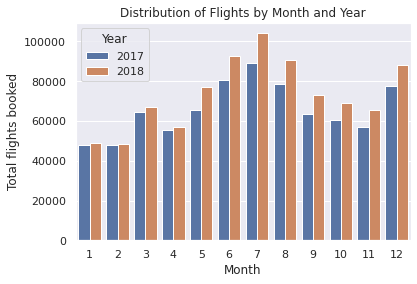

In [30]:
#Creo un nuevo df agrupando los vuelos por año y mes
#Agrupo por año y mes, y sumo los Flights_booked
flights_grouped=df_enquiry.groupby(['Year', 'Month'])['Flights_booked'].sum().reset_index()

#Creo el gráfico
sns.barplot(x='Month', y='Flights_booked', hue='Year', data=flights_grouped)
plt.xlabel('Month')
plt.ylabel('Total flights booked')
plt.title('Distribution of Flights by Month and Year')
plt.grid(axis='y', linestyle='-', color='white', zorder=0) #añade líneas en el eje Y

Otra forma muy práctica de visualización sería con un gráfico de líneas. Para ello, divido el DataFrame por años.

In [ ]:
#Creo df para 2017
df_2017=df_enquiry[df_enquiry['Year'] == 2017]
#Creo df para 2018
df_2018=df_enquiry[df_enquiry['Year'] == 2018]

#Creo el gráfico de líneas
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_2017['Month'], y=df_enquiry['Flights_booked'])
sns.lineplot(x=df_2018['Month'], y=df_enquiry['Flights_booked'])
plt.xlabel('Month', fontsize=16)
plt.ylabel('Total flights booked', fontsize=16)
plt.title('Distribution of Flights by Month and Year', fontsize=20);

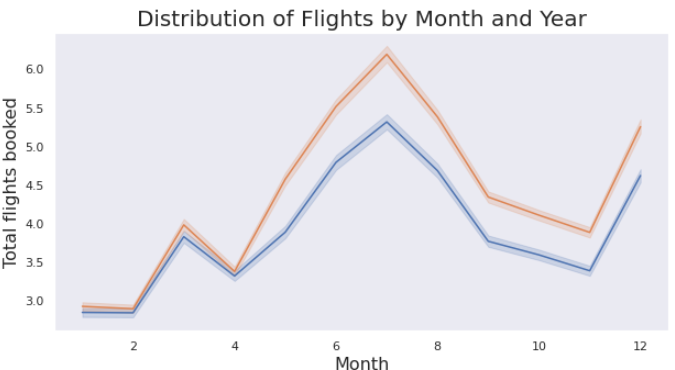

Interpretación:
- Las ventas en 2018 superan a las de 2017; en todos los meses de 2018 ha habido más reservas de vuelos que en el mismo periodo del año anterior (desde febrero, con una mínima diferencia, hasta julio, con el mayor incremento).

- Los meses con mayor número de reservas (más de 80K) son los meses de vacaciones: junio, julio, agosto y diciembre.

- Parece que las ventas siguen un comportamiento similar en ambos años, siendo los meses más bajos los dos primeros y coincidiendo los picos con los periodos festivos del año.

#### 4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

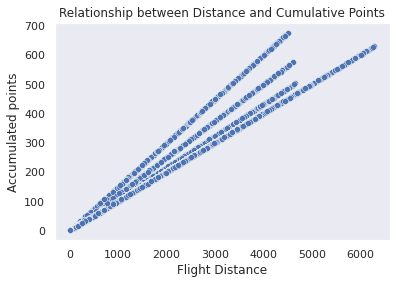

In [33]:
#Utilizo un scatterplot para ver la relación entre la distancia y la cantidad de puntos acumulados
sns.scatterplot(x='Distance', y='Points_accumulated', data=df_enquiry)
plt.xlabel('Flight Distance')
plt.ylabel('Accumulated points')
plt.title('Relationship between Distance and Cumulative Points');

Veo una relación directa entre la distancia y los puntos acumulados.

El hecho de que haya 4 grupos de datos me hace pensar si habrá una relación también con otra variable. Teniendo en cuenta las columnas, me decanto porque la tercera variable es el tipo de Loyalty_card.

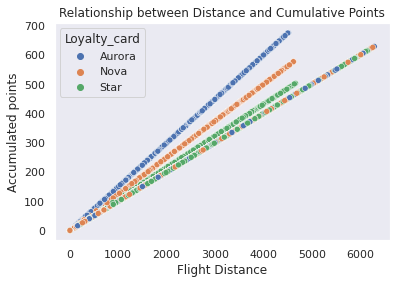

In [34]:
#Añado Loyalty_card al gráfico
sns.scatterplot(x='Distance', y='Points_accumulated', hue='Loyalty_card', data=df_enquiry)
plt.xlabel('Flight Distance')
plt.ylabel('Accumulated points')
plt.title('Relationship between Distance and Cumulative Points');

Interpretación:
- Se observa una relación directa en la que, a mayor distancia, mayor es la cantidad de puntos acumulados.

- En cada línea se puede ver la relación específica de cada tipo de Loyalty_card con los puntos acumulados. La tarjeta que acumula más puntos por distancia volada es la tarjeta Aurora, seguida de Nova y Star.

#### 5. ¿Cuál es la distribución de los clientes por provincia o estado?

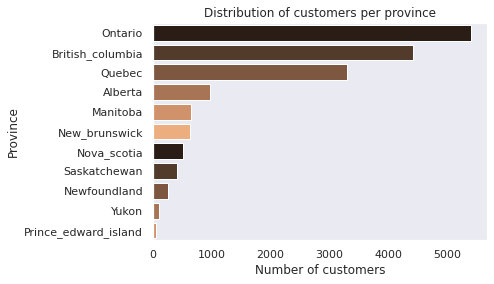

In [35]:
#Creo un nuevo df agrupando por Province y sumando por Loyalty_number
df_province=df_enquiry.groupby('Province')['Loyalty_number'].nunique().reset_index()

#Ordeno el df para que el gráfico salga ordenado también
df_province=df_province.sort_values(by='Loyalty_number', ascending=False)

#Creo el gráfico. Utilizo barplot para ver la relación entre una variable categórica y una numérica.
sns.barplot(x='Loyalty_number', y='Province', data=df_province, palette=sns.color_palette('copper'))
plt.xlabel('Number of customers')
plt.ylabel('Province')
plt.title('Distribution of customers per province');

Interpretación:
- La inmensa mayoría de los clientes residen en las provincias de Ontario, British Columbia y Quebec, que destacan claramente sobre le resto de provincias.

- Las provincias con el menor número de clientes son Yukon y Prince Edward Island, con una representación casi nula.

- La disparidad en la cantidad de clientes según la provincia podría deberse a factores como la cantidad de población que vive en cada una. Tengamos en cuenta que Ontario, British Columbia y Quebec agrupan el 74.7% del total de población de Canadá, mientras que Yukon y Prince Edwad Islan apenas concentran un 0.56%.

#### 6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

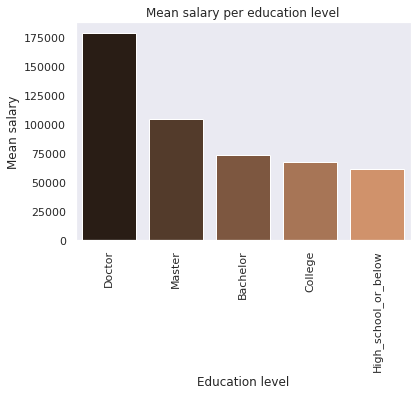

In [36]:
#Creo un nuevo df agrupando por Education y calculando la media de Salary
df_mean_salary = df_enquiry.groupby('Education')['Salary'].mean().reset_index()

#Ordeno por la media salarial
df_mean_salary = df_mean_salary.sort_values(by='Salary', ascending=False)

#Creo el gráfico. Utilizo barplot para ver la relación entre una variable categórica y una numérica.
sns.barplot(x='Education', y='Salary', data=df_mean_salary, palette=sns.color_palette('copper'))
plt.xlabel('Education level')
plt.ylabel('Mean salary')
plt.title('Mean salary per education level')
plt.xticks(rotation=90);

Interpretación:
- La media salarial más alta es para el nivel educativo Doctor, siendo aproximadamente un 75% mayor que la del siguiente nivel, Master, y alrededor de 2.5 veces la media salarial más baja.

- Los niveles más bajos, High_school_or_below, College and Bachelor tienen un crecimiento escalonado similar. Se produce un salto mayor al pasar al cuarto nivel educacional, Master.

#### 7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

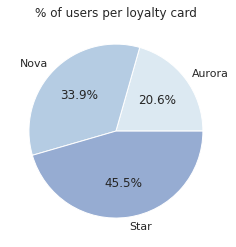

In [37]:
#Agrupo por tipo de Loyalty_card y sumo la cantidad de Loyalty_number
df_cards=df_enquiry.groupby('Loyalty_card')['Loyalty_number'].count().reset_index()

#Creo gráfico de proporciones
plt.pie('Loyalty_number', labels='Loyalty_card', data=df_cards, autopct='%1.1f%%', colors=sns.color_palette('BuPu'))
plt.title('% of users per loyalty card');

Interpretación:
- La tarjeta con más clientes es la Star, con cerca del 50% del total y más del doble que la tarjeta Aurora.

- Se aprecia una relación entre estos porcentajes y la distribución obtenida en la pregunta 2. La tarjeta que obtenía más puntos por distancia volada era la tarjeta Aurora, que en este gráfico es la que tiene un menor % de clientes. En el extrermo opuesto está la tarjeta Star, que era la que menos puntos acumulaba por distancia volada, y que en este gráfico es la que cuenta con mayor % de clientes. Una hipótesis podría ser que la tarjeta Aurora premie más generosamente a sus usuarios, quizás por el hecho de que cuentan con más puntos acumulados, mientras que la tarjeta Star tiene unos requisitos más asequibles y, por tanto, ofrece una recompensa de puntos menor.

#### 8. ¿Cómo se distribuyen los clientes según su estado civil y género?

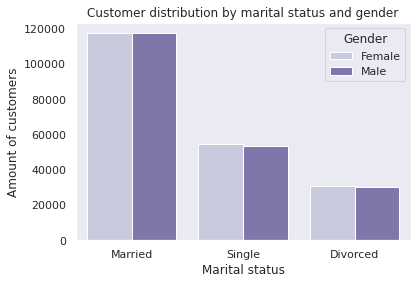

In [38]:
#Creo un gráfico countplot para comparar y por su facilidad de interpretación
sns.countplot(x='Marital_status', hue='Gender', data=df_enquiry, palette='Purples')
plt.xlabel('Marital status')
plt.ylabel('Amount of customers')
plt.title('Customer distribution by marital status and gender');

Interpretación:
- Apenas se aprecia diferencia en la distribución del estado civil por género, siendo prácticamente iguales en los tres casos para mujeres y hombres.

- El estado civil más común es Married, con más del doble de clientes que el siguiente estado civil, Single, y aproximadamente 4 veces más que Divorced.

### Fase 3. Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio:

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para
ello, los pasos que deberas seguir son:

9. Preparación de Datos:
    - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [39]:
#Creo el nuevo df con las columnas necesarias e imprimo información básica
df_testing=df_customers[['Education', 'Flights_booked']]
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Education       403760 non-null  object
 1   Flights_booked  403760 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


10. Análisis Descriptivo:
    - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [40]:
#Saco las estadísticas
df_testing.groupby('Education').describe()

Flights_booked                                          \
                              count      mean       std  min  25%  50%  75%   
Education                                                                     
Bachelor                   252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0   
College                    102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0   
Doctor                      17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0   
High_school_or_below        18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0   
Master                      12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0   

                            
                       max  
Education                   
Bachelor              21.0  
College               21.0  
Doctor                21.0  
High_school_or_below  21.0  
Master                21.0

Interpretación:
- El nivel educativo que reserva más vuelos es Bachelor, siendo más del doble que College, y aproximadamente 20 veces más que el grupo que reserva menos vuelos, Master.

- El promedio de reservas para cada cliente, en cada nivel educativo, es muy similar, no se aprecian grandes diferencias.

- La desviación estándar es casi idéntica también para todos los niveles educativos, con una dispersión aproximada de 5.2 alrededor de la media.

- Los mínimos a 0 en todos los niveles educativos indican que en todos ellos hay algún cliente que todavía no ha hecho ninguna reserva.

- Percentil 25. El 25% de los clientes han reservado 0 vuelos, en todos los niveles educativos.

- Percentil 50. Indica una mediana de 1 en todos los casos, lo que significa que el 50% de los clientes en cada nivel educativo han reservado 1 vuelo o menos.

- Percentil 75. El 75% de los clientes han reservado 8 vuelos o menos, en todos los niveles educativos.

- El máximo de vuelos reservados coincide en todos los niveles educativos, 21 vuelos.

11. Prueba Estadística:
    - Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

👣 Paso 1. Definir el objetivo del experimento.

Determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

👣 Paso 2. Identificar Métricas Clave.

Número de vuelos reservados (Flights_booked).

👣 Paso 3. Definir hipótesis.

- Hipótesis nula (H0): no existe ninguna diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

- Hipótesis alternativa (H1): sí existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

👣 Paso 4. Elegir el diseño del experimento.

- ANOVA por tratarse de más de dos grupos.

- Se considerará la prueba Kruskal-Wallis en caso de que no exista normalidad ni homogeneidad en los datos.

👣 Paso 5. Recolección de Datos.

Todos los datos recogidos en df_testing, que están divididos en niveles educativos.

👣 Paso 6. Asignación de unidades experimentales.

Clientes agrupados según su nivel educativo.

👣 Paso 7. Implementar el Experimento.

Realización de las pruebas estadísticas:

- Test Shaprio-Wilk y Test Kolmogorov-Smirnov para determinar si existe una distribución normal de los datos.

- Test de Levene para determinar si las varianzas son homogéneas.

In [41]:
#Verifico la normalidad
#Realizo el test Shapiro-Wilk para cada grupo (i=nivel educativo) y guardo los resultados en normality_results
normality_results=[]

for i in df_testing['Education'].unique():
    stat, p_value = stats.shapiro(df_testing[df_testing['Education'] == i]['Flights_booked'])
    normality_results.append((i, stat, p_value))

#Muestro los resultados para ver el p-value de cada nivel educativo
for i in normality_results:
    print(f'Education level: {i[0]}, Shapiro-Wilk test: {i[1]}, p-value: {i[2]}')

/home/isabelmartinez/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 252567.
  res = hypotest_fun_out(*samples, **kwds)
/home/isabelmartinez/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 102260.
  res = hypotest_fun_out(*samples, **kwds)
/home/isabelmartinez/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12287.
  res = hypotest_fun_out(*samples, **kwds)
/home/isabelmartinez/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18915.
  res = hypotest_fun_out(*samples, **kwds)


Education level: Bachelor, Shapiro-Wilk test: 0.7871846366849388, p-value: 3.042757977136549e-155
Education level: College, Shapiro-Wilk test: 0.7908647154190093, p-value: 5.410217817355713e-134
Education level: Master, Shapiro-Wilk test: 0.7967170834012285, p-value: 1.2401712001218998e-81
Education level: High_school_or_below, Shapiro-Wilk test: 0.7921745485248602, p-value: 2.36475859073514e-92
Education level: Doctor, Shapiro-Wilk test: 0.7910941292405789, p-value: 6.374563388948906e-91


/home/isabelmartinez/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17731.
  res = hypotest_fun_out(*samples, **kwds)


Observo que los datos de todos los niveles educativos no siguen una distribución normal (p-value < 0.05) pero no puedo confiar ciegamente en este resultado porque el test Shapiro-Wilk puede no ser confiable cuando el tamaño de la muestra es mayor a 5000. Así que voy a hacer una segunda comprobación de la normalidad de los datos con el test Kolmogorov-Smirnov.

In [42]:
#Hago una función para realizar el Test Kolmogorov-Smirnov 
def test_normality_ks(data):
    return kstest(data, 'norm')

#Realizo el test para cada nivel educativo
alpha=0.05
ks_results=[]

for i in df_testing['Education'].unique():
    flights=df_testing[df_testing['Education'] == i]['Flights_booked']
    stat, p_value=test_normality_ks(flights)
    ks_results.append((i, stat, p_value))
    print(f'\nEducation level: {i}, K-S statistic: {stat}, p-value: {p_value}')

    #Verifico la normalidad
    if p_value > alpha:
        print(f'The data in the {i} group follows a normal distribution (p-value = {p_value})')
    else:
        print(f'The data in the {i} group does not follow a normal distribution (p-value = {p_value})')


Education level: Bachelor, K-S statistic: 0.5, p-value: 0.0
The data in the Bachelor group does not follow a normal distribution (p-value = 0.0)

Education level: College, K-S statistic: 0.5, p-value: 0.0
The data in the College group does not follow a normal distribution (p-value = 0.0)

Education level: Master, K-S statistic: 0.5, p-value: 0.0
The data in the Master group does not follow a normal distribution (p-value = 0.0)

Education level: High_school_or_below, K-S statistic: 0.5, p-value: 0.0
The data in the High_school_or_below group does not follow a normal distribution (p-value = 0.0)

Education level: Doctor, K-S statistic: 0.5, p-value: 0.0
The data in the Doctor group does not follow a normal distribution (p-value = 0.0)


Confirmada la no normalidad.

Paso a verificar la homogeneidad de las varianzas.

In [43]:
#Verifico la homogeneidad
#1. for i in df_testing['Education'].unique() --> itera sobre cada nivel educativo
#2. df_testing[df_testing['Education'] --> filtra el df para incluir sólo las filas donde Education sea = i
#3. ['Flights_booked'] --> después de filtrar por nivel educativo i, se queda con la cantidad de Flights_booked para esa i
groups=[df_testing[df_testing['Education'] == i]['Flights_booked'] for i in df_testing['Education'].unique()]

#Realizo el test de Levene
stat, p_value = levene(*groups)

#Guardo el resultado en una variable (para el paso 9)
levene_result={'Statistic':stat, 'p-value':p_value}

#Imprimo resultado del test
print(f"Levene's test: {stat}, p-value: {p_value}")

Levene's test: 3.0859845824023706, p-value: 0.014969793534581529


Las varianzas tampoco son homogéneas (p-value < 0.05).

👣 Paso 8. Análisis de los datos.

- Los resultados del test de Saphiro-Wilk indican que los datos no siguen una distribución normal.

- Los resultados del test de Levene indican que las varianzas no son homogéneas.

- Se descarta la posibilidad de realizar el análisis ANOVA porque no existe normalidad ni homogeneidad en los datos.

👣 Paso 9. Prueba no paramétrica:

Descartado el análisis ANOVA por incumplimiento de los requisitos para su realización, opto por realizar la prueba no paramétrica Kruskal-Wallis, que determina si hay diferencias significativas en las medianas de tres o más grupos independientes cuando no existe normalidad u homogeneidad de varianzas.

In [44]:
#Prueba Kruskal-Wallis
#Guardo los grupos en una lista
groups=[]
for i in df_testing['Education'].unique():
    group=df_testing[df_testing['Education'] ==i]['Flights_booked']
    groups.append(group)

#Realizo la prueba de Kruskal-Wallis 
#(*groups) desempaqueta la lista en elementos individuales (cada nivel educativo) para tomar cada uno como un conjunto de datos separado
#Kruskal-Wallis calcula una estadística de prueba (H) que mide si las medianas de los grupos son todas iguales o si al menos un grupo tiene una mediana diferente.
stat, p_value = stats.kruskal(*groups)

print(f'H statistic: {stat}, p-value: {p_value}')

#Interpretación de los resultados
if p_value < 0.05:
    interpretation='There are statistically significant differences in the medians of the groups.'
else:
    interpretation='There are no statistically significant differences in the medians of the groups.'

#Imprimo interpretación
print(interpretation)

#Guardo el resultado en una variable (para el paso 9)
kruskal_result={'Statistic':stat, 'p_value':p_value, 'Interpretation':interpretation}

H statistic: 17.532618623121756, p-value: 0.0015225470219889367
There are statistically significant differences in the medians of the groups.


👣 Paso 10. Recopilación y Monitoreo de Datos.
Se recopilan los resultados de las pruebas.

In [45]:
normality=normality_results
print(f'Normality results\n{normality}\n')
homogeneity=levene_result
print(f'Homogeneity results\n{homogeneity}\n')
kruskal=kruskal_result
print(f'Kruskal-Wallis test shows:\n{kruskal}')

Normality results
[('Bachelor', 0.7871846366849388, 3.042757977136549e-155), ('College', 0.7908647154190093, 5.410217817355713e-134), ('Master', 0.7967170834012285, 1.2401712001218998e-81), ('High_school_or_below', 0.7921745485248602, 2.36475859073514e-92), ('Doctor', 0.7910941292405789, 6.374563388948906e-91)]

Homogeneity results
{'Statistic': 3.0859845824023706, 'p-value': 0.014969793534581529}

Kruskal-Wallis test shows:
{'Statistic': 17.532618623121756, 'p_value': 0.0015225470219889367, 'Interpretation': 'There are statistically significant differences in the medians of the groups.'}


Se concluye con el rechazo de la hipótesis nula.

👣 Paso 11. Interpretación y Comunicación de los Resultados.

Conclusiones:

- Los resultados de la prueba de Kruskal-Wallis sugieren que existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos. Se rechaza la hipótesis nula.

- Esto significa que al menos un grupo tiene una mediana significativamente diferente de los demás en términos de la cantidad de vuelos reservados.

- Estas diferencias indican que el nivel educativo de los clientes influye en sus comportamientos de reserva de vuelos, es decir, que el nivel educativo tiene un impacto significativo en el número de vuelos reservados.

- Podría ser útil realizar un análisis que identifque esos grupos que difieren para poder considerar acciones de marketing específicas.

👣 Paso 12. Toma de Decisiones.

Se podrían ajustar estrategias de marketing y ventas o diseñar otras nuevas para incentivar el incremento de reservas de vuelos en los grupos que se consideren más relevantes.